In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Linear regression with one variable

In [6]:
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
#1
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0, 0.5, 'Profit')

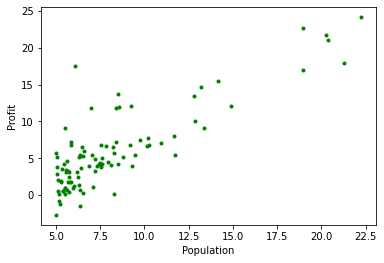

In [8]:
#2
plt.plot(data['Population'], data['Profit'], 'g.')
plt.xlabel("Population")
plt.ylabel("Profit")

In [9]:
#3
from copy import deepcopy
data_extended = deepcopy(data)
data_extended.insert(0, "Offset", 1)
data_extended.head()

,Offset,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [10]:
#4
X = data_extended[["Offset", "Population"]]
y = data_extended["Profit"]

In [11]:
X.head()

,Offset,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [13]:
#5
X = np.array(X.values)
y = np.array(y.values)
theta = np.array([0.0,0.0], dtype=float)

In [14]:
#6
def computeCost(X_arr, y_arr, theta_coef):
    error_vector = np.power(np.dot(X_arr, theta.transpose()) - y_arr, 2)
    error_sum = np.sum(error_vector)
    return error_sum / (2*len(y_arr))
    

In [15]:
#7
print(computeCost(X, y, theta))

32.072733877455676


In [16]:
#8
def gradient_prosty(X_arr, y_arr, theta, alpha, it):
    cost = []
    for iteration in range(it):
        m = len(y_arr)
        error_vector = np.dot(X_arr, theta.transpose()) - y_arr
        derivative_theta0 = (1/m) * np.sum(error_vector)
        theta[0] -= alpha * derivative_theta0
        for i in range(1, theta.shape[0]):
            derivative_theta = (1/m) * np.sum(np.dot(error_vector, X_arr[:, i]))
            theta[i] -= alpha * derivative_theta
        cost.append(computeCost(X_arr, y_arr, theta))
    return theta, cost

In [17]:
#9
theta = np.array([0.0,0.0], dtype=float)
#10
theta, cost = gradient_prosty(X, y, theta, 0.01, 2000)
theta

array([-3.78806857,  1.18221277])

Text(0, 0.5, 'Cost')

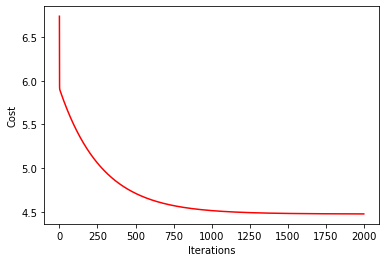

In [18]:
#11
plt.plot(range(0, len(cost)), cost, 'r-')
plt.xlabel("Iterations")
plt.ylabel("Cost")

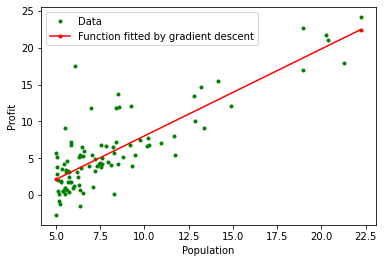

In [19]:
#12
x_min = data['Population'].min()
x_max = data['Population'].max()
y_min = theta[0] + theta[1]*x_min
y_max = theta[0] + theta[1]*x_max


plt.plot(data['Population'], data['Profit'], 'g.', label="Data")
plt.plot([x_min, x_max], [y_min, y_max], 'r.-', label="Function fitted by gradient descent")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.legend()


## Linear regression with multiple variables

In [26]:
path = os.getcwd() + '/dane2.txt'
data_housing = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data_housing.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [27]:
data_housing.mean()

Size          2000.680851
Bedrooms         3.170213
Price       340412.659574
dtype: float64

In [28]:
data_housing -= data_housing.mean()
data_housing /= data_housing.std()
data_housing.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [29]:
from copy import deepcopy
data_housing_extended = deepcopy(data_housing)
data_housing_extended.insert(0, "Offset", 1)
data_housing_extended.head()

,Offset,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [30]:
X = data_housing_extended[["Offset", "Size", "Bedrooms"]]
y = data_housing_extended["Price"]
X = np.array(X.values)
y = np.array(y.values)
theta = np.array([0.0, 0.0, 0.0], dtype=float)

In [31]:
print(computeCost(X, y, theta))

0.48936170212765967


In [32]:
theta, cost = gradient_prosty(X, y, theta, 0.01, 2000)
theta

array([-1.01709421e-16,  8.84682367e-01, -5.30951990e-02])

Text(0, 0.5, 'Cost')

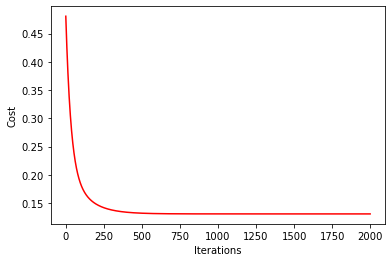

In [33]:
plt.plot(range(0, len(cost)), cost, 'r-')
plt.xlabel("Iterations")
plt.ylabel("Cost")

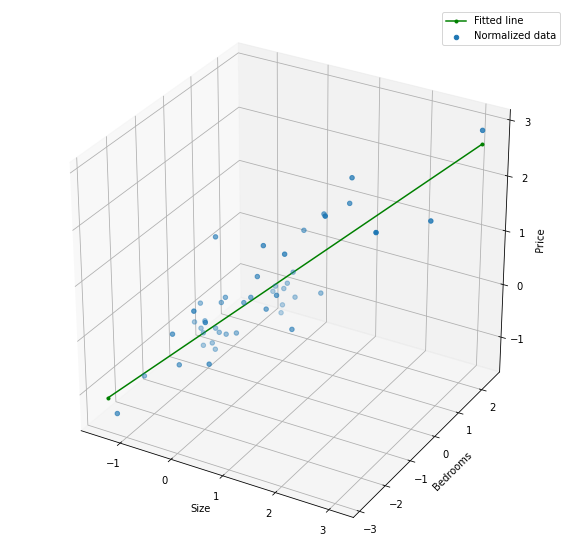

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = [data_housing['Size'].min(), data_housing['Size'].max()]
y = [data_housing['Bedrooms'].min(), data_housing['Bedrooms'].max()]
z = [theta[0] + theta[1]*x[0] + theta[2]*y[0], theta[0] + theta[1]*x[1] + theta[2]*y[1]]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data_housing['Size'], ys=data_housing['Bedrooms'], zs=data_housing['Price'], s=20, label="Normalized data")
ax.plot(x, y, z, 'g.-', label="Fitted line")

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.legend()

plt.show()

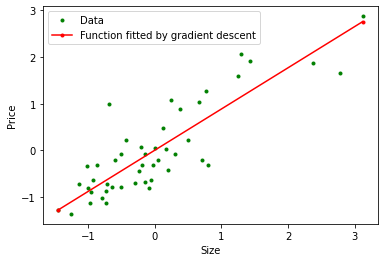

In [35]:
x_min = data_housing['Size'].min()
x_max = data_housing['Size'].max()
y_min = theta[0] + theta[1]*x_min
y_max = theta[0] + theta[1]*x_max


plt.plot(data_housing['Size'], data_housing['Price'], 'g.', label="Data")
plt.plot([x_min, x_max], [y_min, y_max], 'r.-', label="Function fitted by gradient descent")
plt.xlabel("Size")
plt.ylabel("Price")
plt.legend()

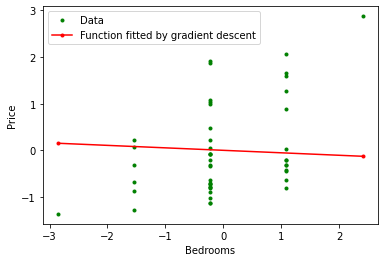

In [36]:
x_min = data_housing['Bedrooms'].min()
x_max = data_housing['Bedrooms'].max()
y_min = theta[0] + theta[2]*x_min
y_max = theta[0] + theta[2]*x_max


plt.plot(data_housing['Bedrooms'], data_housing['Price'], 'g.', label="Data")
plt.plot([x_min, x_max], [y_min, y_max], 'r.-', label="Function fitted by gradient descent")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.legend()

## Linear regression - Python

In [39]:
import numpy as np# print(boston.DESCR)
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
 
# Import danych
# Normalizacja/Standaryzacja
# Podział na zbiór treningowy i testowy (70-30%)


#1
boston = datasets.load_boston()
items_in_database = boston.data.shape[0]
X_train = boston.data[:int(0.7*items_in_database), :]
Y_train = boston.target[:int(0.7*items_in_database)]
X_test = boston.data[int(0.7*items_in_database):, :]
Y_test = boston.target[int(0.7*items_in_database):]

#2
# Stworzenie obiektu 
regr = linear_model.LinearRegression()
 
# Uczenie modelu przy pomocy bazy treningowej
regr.fit(X_train, Y_train)
#3
# Wyświetlenie parametrów prostej
print('Coefficients: \n', regr.coef_)

# Przewidywanie wartości dla danych testowych
Y_predicted = regr.predict(X_test) 
#  Obliczamy rzeczywisty popełniony błąd średnio-kwadratowy
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [ 1.29693856  0.01469497  0.04050457  0.79060732 -9.12933243  9.24839787
 -0.0451214  -0.91395374  0.14079658 -0.01477291 -0.63369567  0.01577172
 -0.09514128]
Residual sum of squares: 546.9193565310729


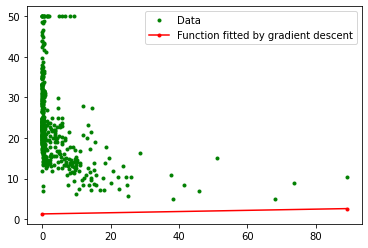

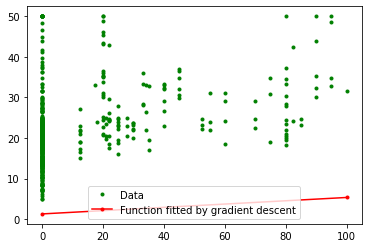

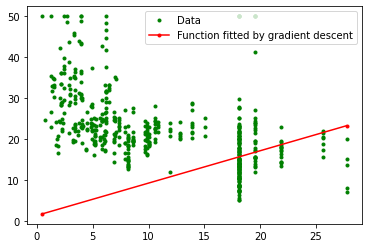

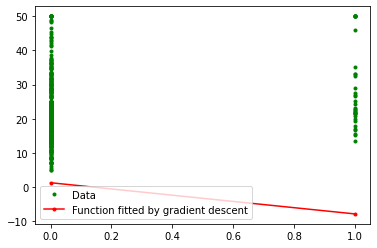

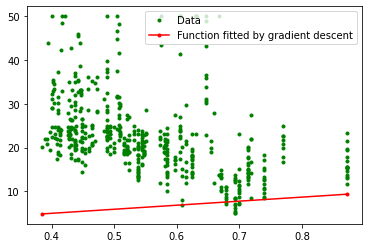

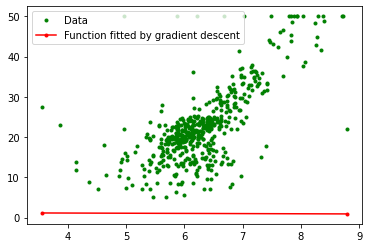

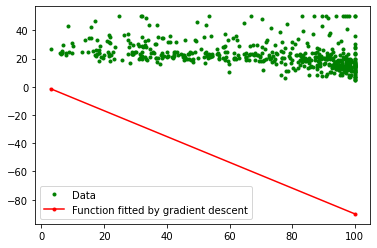

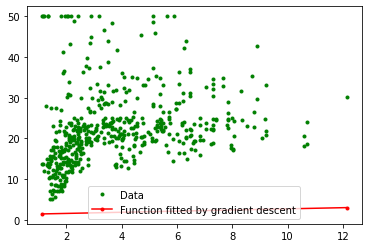

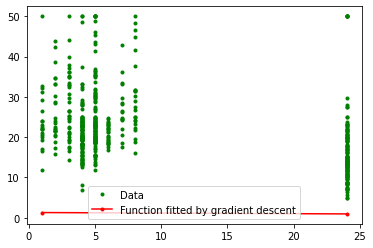

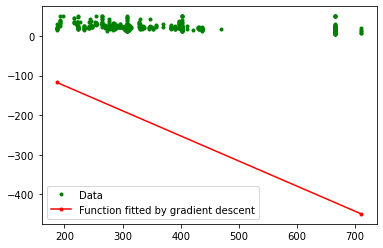

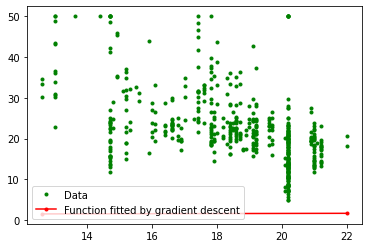

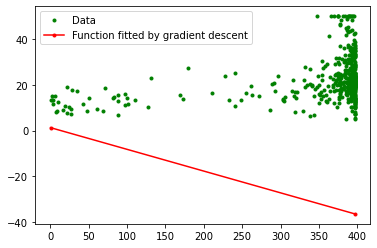

In [40]:
for idx in range(12):
    x_min = boston.data[:, idx].min()
    x_max = boston.data[:, idx].max()
    y_min = regr.coef_[0] + regr.coef_[idx+1]*x_min
    y_max = regr.coef_[0] + regr.coef_[idx+1]*x_max

    plt.plot(boston.data[:, idx], boston.target, 'g.', label="Data")
    plt.plot([x_min, x_max], [y_min, y_max], 'r.-', label="Function fitted by gradient descent")
    plt.legend()
    plt.show()